<a href="https://colab.research.google.com/github/Abhishek4848/Datasets/blob/master/PerformanceMetrics_MLstreaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import csv
from statistics import mean
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import joblib

In [2]:
!git clone https://github.com/Abhishek4848/Datasets.git

Cloning into 'Datasets'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 105 (delta 25), reused 70 (delta 9), pack-reused 0
Receiving objects: 100% (105/105), 1.74 MiB | 13.88 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [3]:
BASE_DIR = "Datasets/"
TEST_DIR = "Datasets/test/"
BATCH_DATASET_DIR = "Datasets/batches_datasets/"

In [4]:
def classifier_perf_metric(cl, size):
  acc=[]
  precision=[]
  recall=[]
  f1_score=[]
  batch = []
  with open(cl+'.csv', 'r') as file:
    data = csv.reader(file, delimiter = ',')

    for row in data:
      acc.append(float(row[1]))
      precision.append(float(row[2]))
      recall.append(float(row[3]))
      f1_score.append(float(row[4]))
  batch = [i+1 for i in range(len(acc))]
  plot_batch_vs_acc(acc, precision, recall, f1_score, batch, cl[4:], size)
  file.close()

def classifiers_metric(metric):
  for j in ["1","5","10","15"]:
    classifiers = ["mNB", "bNB", "SGD"]
    metric_flag = 0
    metric_means=[]
    if metric == "accuracy":
      metric_flag = 1
    elif metric == "precision":
      metric_flag = 2
    elif metric == "recall":
      metric_flag = 3
    else:
      metric_flag = 4
    for i in classifiers:
      metric_list=[]
      with open(BATCH_DATASET_DIR + j+'k/'+i+'.csv', 'r') as file:
        data = csv.reader(file, delimiter = ',')
        for row in data:
            if(row[metric_flag] == 'nan'):
              row[metric_flag] = int(0)
            metric_list.append(float(row[metric_flag]))
        metric_means.append(mean(metric_list))
    plt.bar(classifiers, metric_means, color = 'r', label = 'Batch Size='+j+'k, avg performance for '+metric)
    plt.xlabel('Classifier')
    plt.ylabel(metric)
    plt.legend()
    plt.show()
  file.close()

In [5]:
def plot_batch_vs_acc(acc, precision, recall, f1_score, batch, cl, size='NA'):
  plt.bar(batch, acc, color = 'r', label = 'Classifier-'+cl+', accuracy for each batch, size='+size)
  plt.xlabel('Batch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  plt.bar(batch, precision, color = 'b', label = 'Classifier-'+cl+', precision for each batch, size='+size)
  plt.xlabel('Batch')
  plt.ylabel('Precision')
  plt.legend()
  plt.show()

  plt.bar(batch, recall, color = 'y', label = 'Classifier-'+cl+', recall for each batch, size='+size)
  plt.xlabel('Batch')
  plt.ylabel('Recall')
  plt.legend()
  plt.show()

  plt.bar(batch, f1_score, color = 'm', label = 'Classifier-'+cl+', f1 score for each batch, size='+size)
  plt.xlabel('Batch')
  plt.ylabel('f1 score')
  plt.legend()
  plt.show()

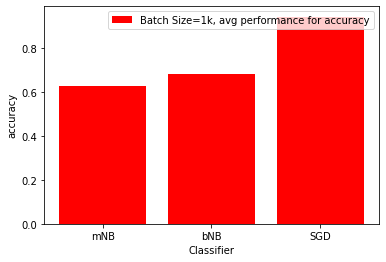

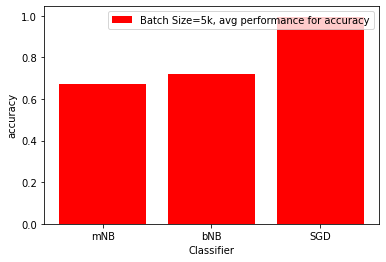

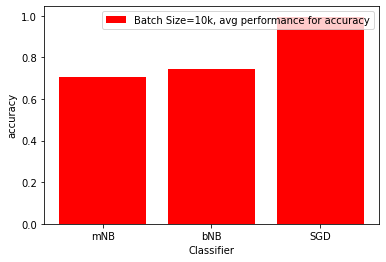

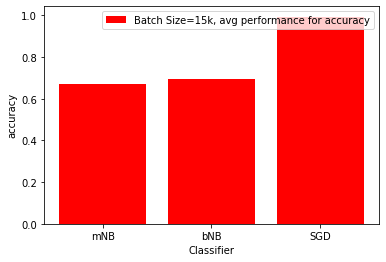

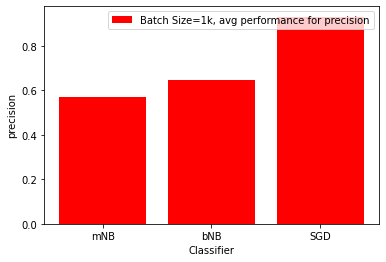

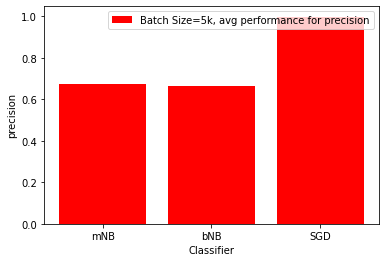

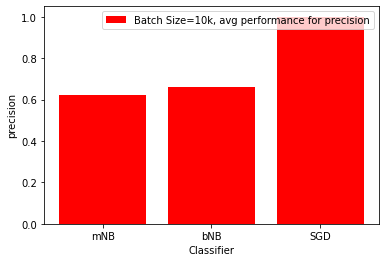

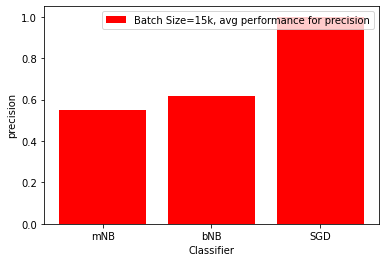

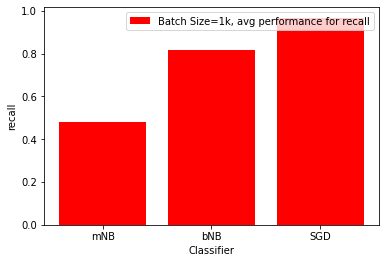

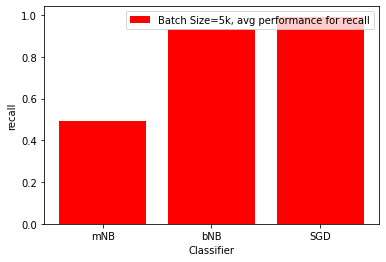

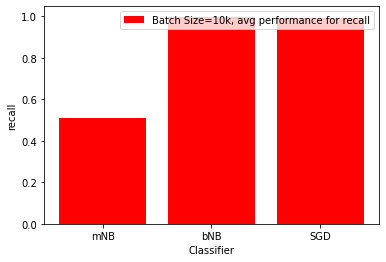

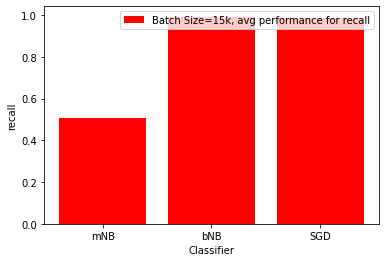

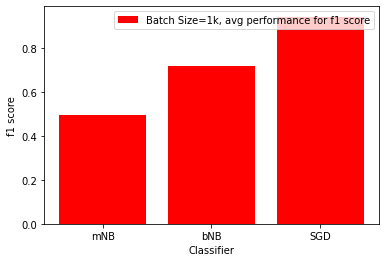

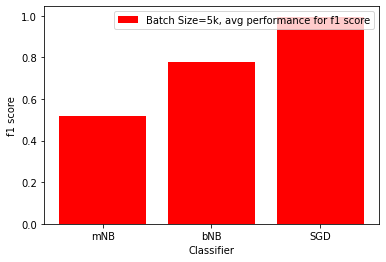

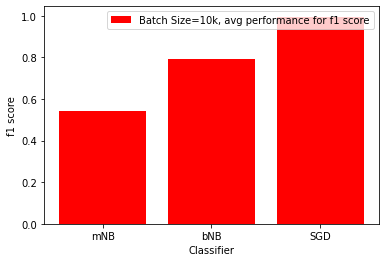

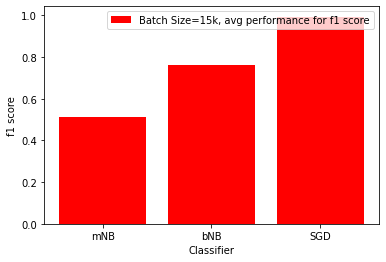

In [6]:
classifiers_metric('accuracy')
classifiers_metric('precision')
classifiers_metric('recall')
classifiers_metric('f1 score')

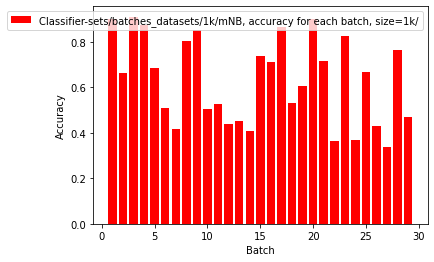

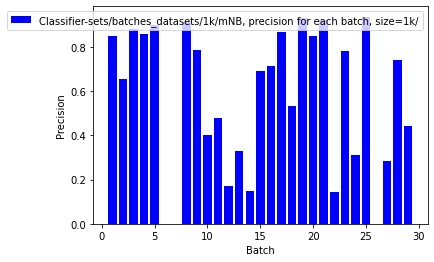

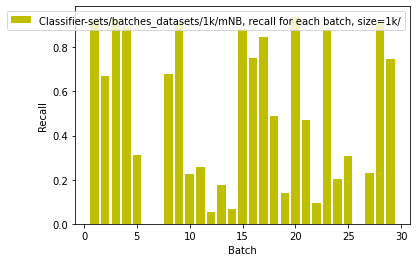

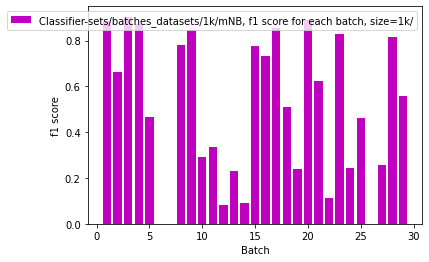

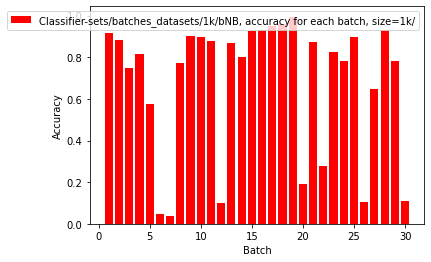

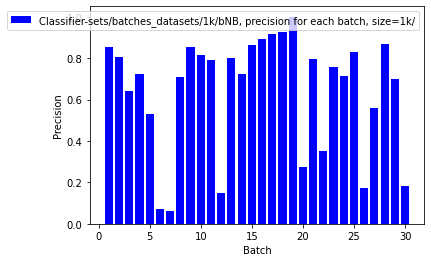

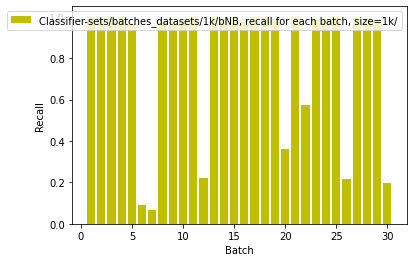

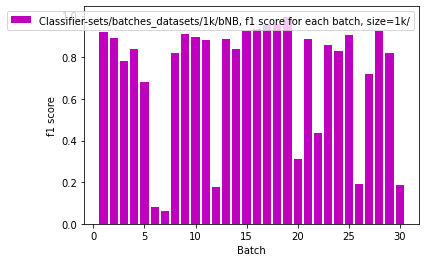

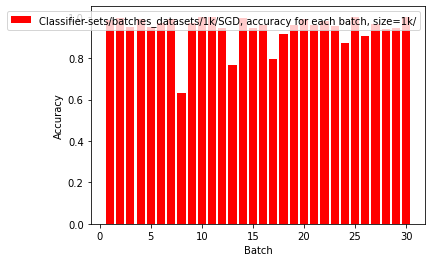

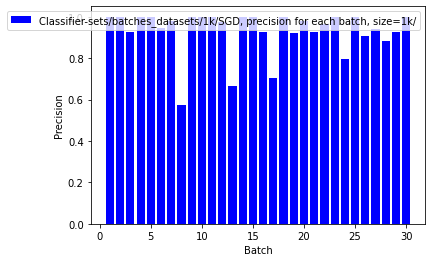

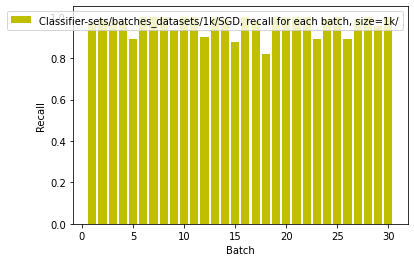

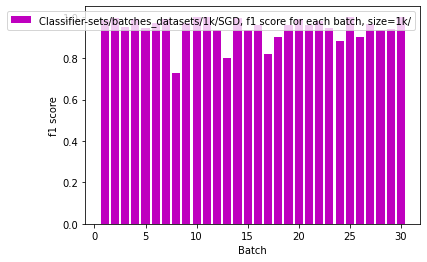

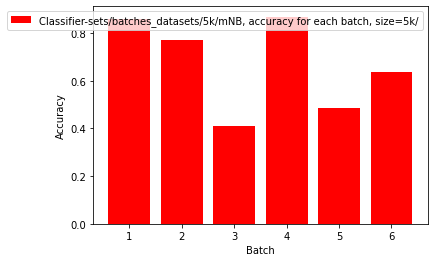

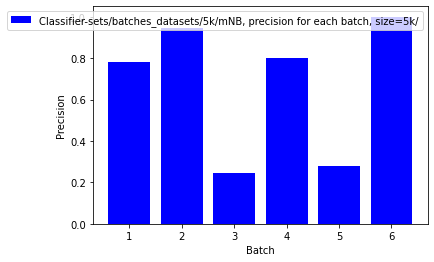

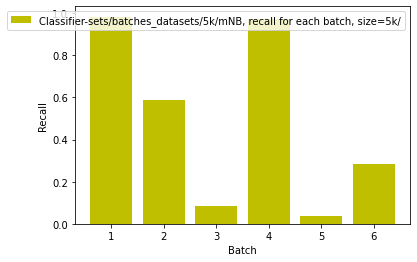

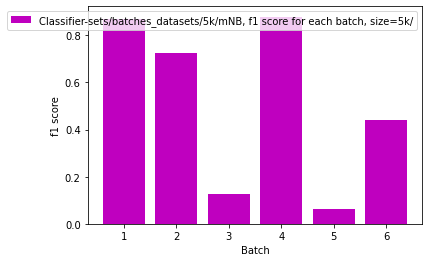

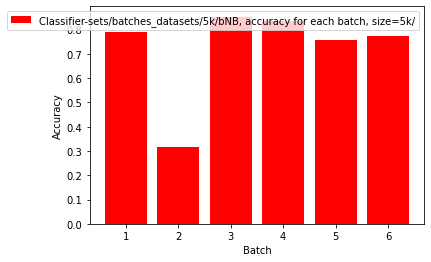

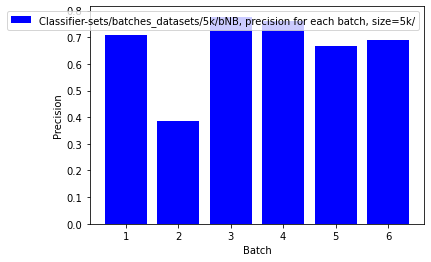

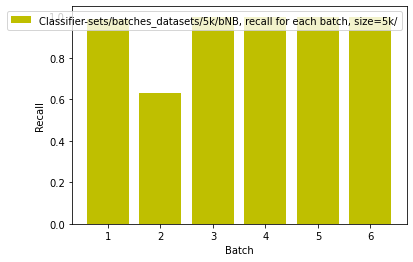

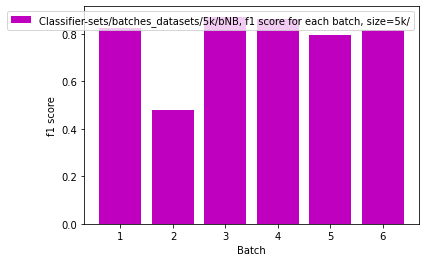

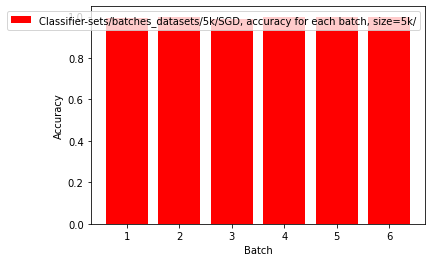

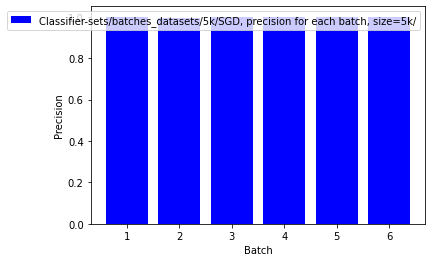

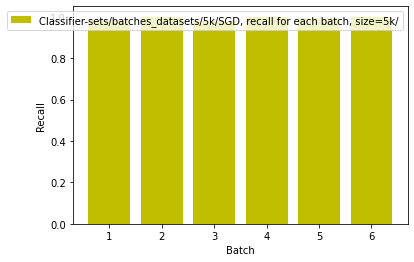

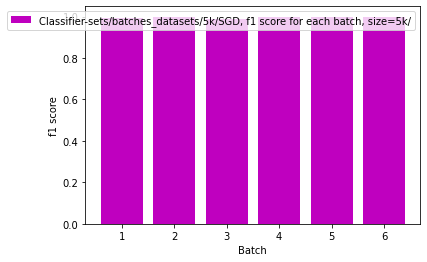

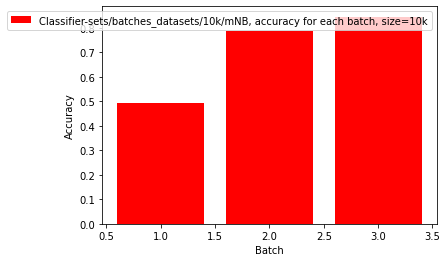

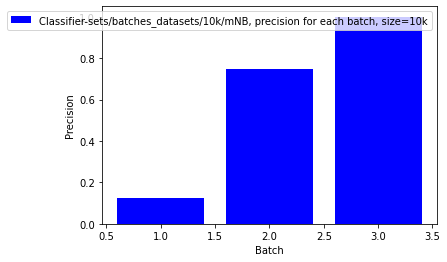

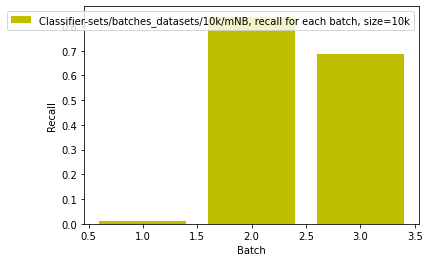

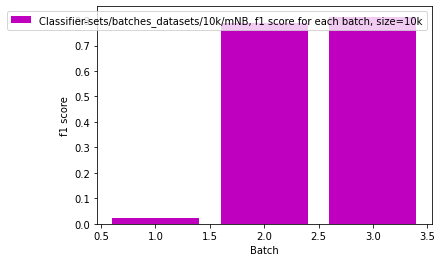

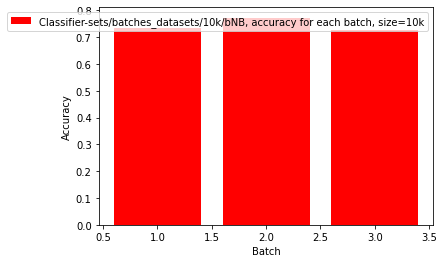

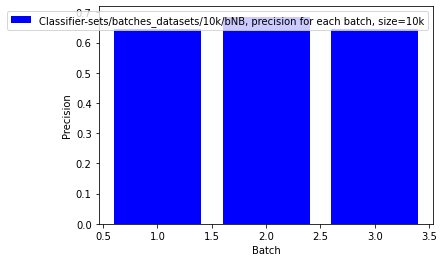

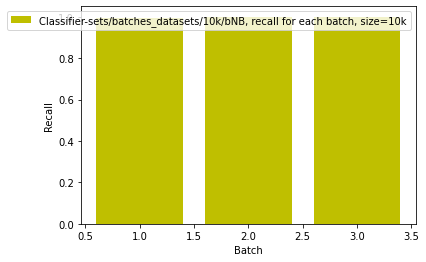

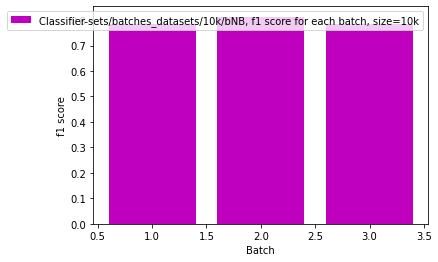

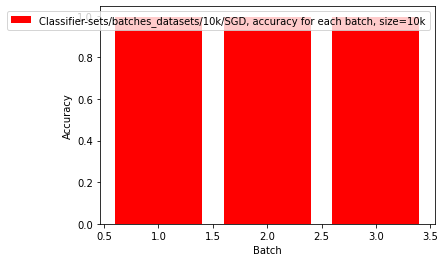

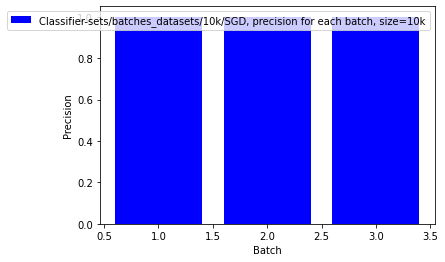

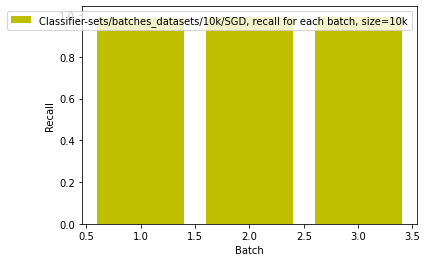

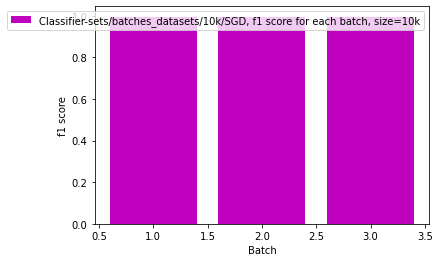

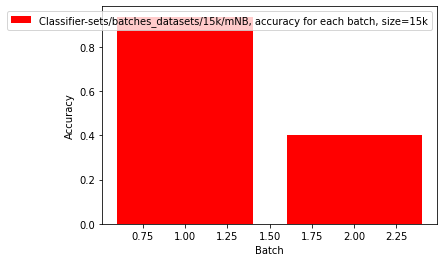

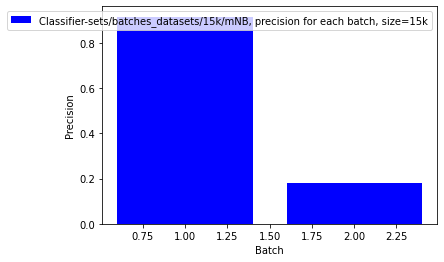

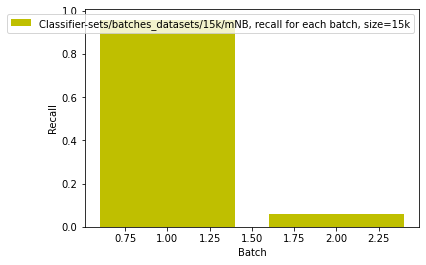

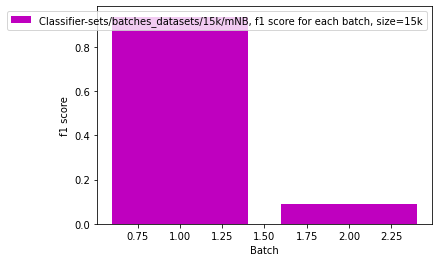

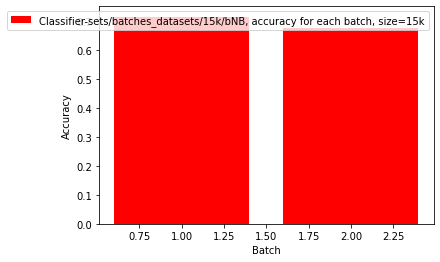

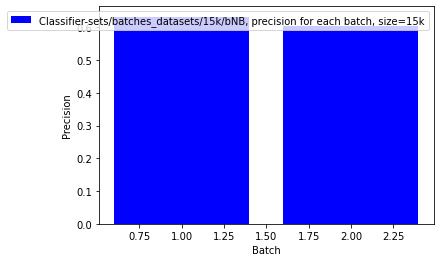

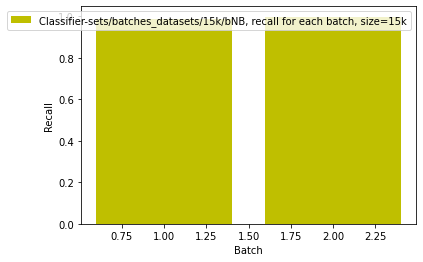

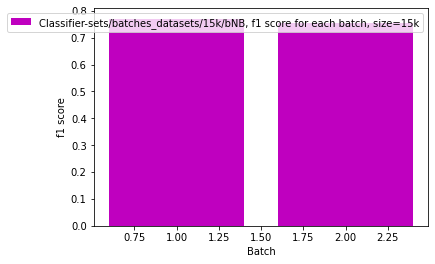

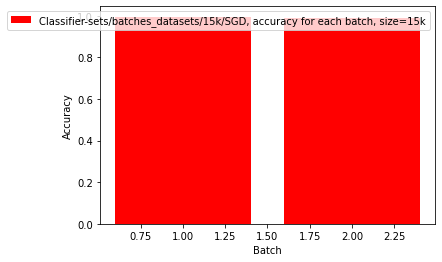

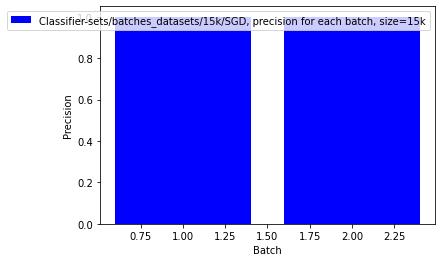

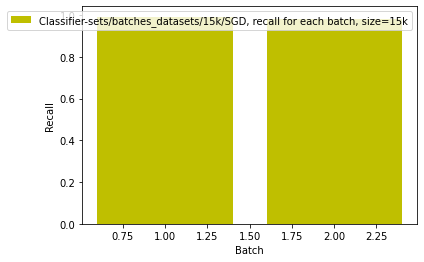

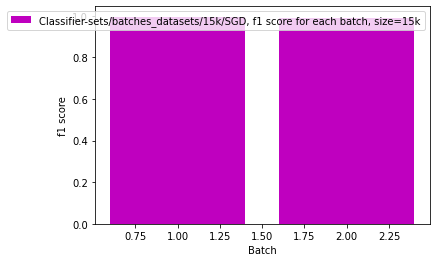

In [7]:
for j in ['1k/', '5k/', '10k/', '15k/']:
  classifier_perf_metric(BATCH_DATASET_DIR + j+'mNB', j[0:3])
  classifier_perf_metric(BATCH_DATASET_DIR + j+'bNB', j[0:3])
  classifier_perf_metric(BATCH_DATASET_DIR +  j+'SGD', j[0:3])

In [8]:
def avg_scores(dataset_name):
  url = f'https://raw.githubusercontent.com/Abhishek4848/Datasets/master/Spark%20streaming%20Metrics/{dataset_name}.csv'
  df = pd.read_csv(url,header=None)
  df.columns = ['Score', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
  return([df['Accuracy'].mean(),df['Precision'].mean(),df['Recall'].mean(),df['F1 Score'].mean()])

In [9]:
bnb_1k = avg_scores("bnb/bNB_1k")
bnb_5k = avg_scores("bnb/bNB_5k")
bnb_10k = avg_scores("bnb/bNB_10k")
bnb_15k = avg_scores("bnb/bNB_15k")
mnb_1k = avg_scores("mnb/mNB_1k")
mnb_5k = avg_scores("mnb/mNB_5k")
mnb_10k = avg_scores("mnb/mNB_10k")
mnb_15k = avg_scores("mnb/mNB_15k")
sgd_1k = avg_scores("sgd/SGD_1K")
sgd_5k = avg_scores("sgd/SGD_5K")
sgd_10k = avg_scores("sgd/SGD_10k")
sgd_15k = avg_scores("sgd/SGD_15K")

## BernoulliNB Classifier

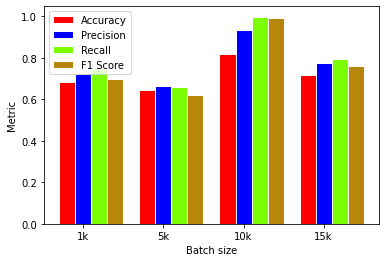

In [10]:
x = np.arange(4)
width = 0.2
plt.bar(x-0.2,bnb_1k, width, color='red',edgecolor='white')
plt.bar(x, bnb_5k, width, color='blue',edgecolor='white')
plt.bar(x+0.2, bnb_10k, width, color='lawngreen',edgecolor='white')
plt.bar(x+0.4, bnb_15k, width, color='darkgoldenrod',edgecolor='white')
plt.xticks(x, ['1k', '5k', '10k', '15k'])
plt.xlabel("Batch size")
plt.ylabel("Metric")
plt.legend(["Accuracy", "Precision", "Recall", "F1 Score"])
plt.show()

## MultinomialNB Classifier

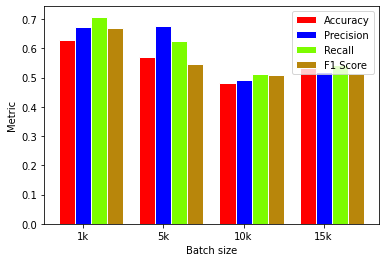

In [11]:
x = np.arange(4)
width = 0.2
plt.bar(x-0.2,mnb_1k, width, color='red',edgecolor='white')
plt.bar(x, mnb_5k, width, color='blue',edgecolor='white')
plt.bar(x+0.2, mnb_10k, width, color='lawngreen',edgecolor='white')
plt.bar(x+0.4, mnb_15k, width, color='darkgoldenrod',edgecolor='white')
plt.xticks(x, ['1k', '5k', '10k', '15k'])
plt.xlabel("Batch size")
plt.ylabel("Metric")
plt.legend(["Accuracy", "Precision", "Recall", "F1 Score"])
plt.show()

## SGD Classifier

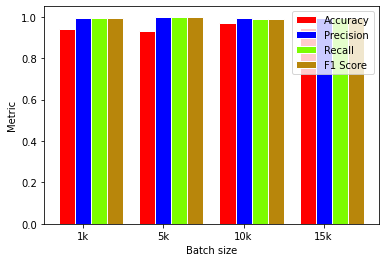

In [12]:
x = np.arange(4)
width = 0.2
plt.bar(x-0.2,sgd_1k, width, color='red',edgecolor='white')
plt.bar(x, sgd_5k, width, color='blue',edgecolor='white')
plt.bar(x+0.2, sgd_10k, width, color='lawngreen',edgecolor='white')
plt.bar(x+0.4, sgd_15k, width, color='darkgoldenrod',edgecolor='white')
plt.xticks(x, ['1k', '5k', '10k', '15k'])
plt.xlabel("Batch size")
plt.ylabel("Metric")
plt.legend(["Accuracy", "Precision", "Recall", "F1 Score"])
plt.show()

## Hyperparameter performance

In [13]:
bnb_10k_alpha = avg_scores("hyperparameter/bNB_10k_allpha0.5")
mnb_10k_alpha = avg_scores("hyperparameter/mNB_10k_alpha0.5")
sgd_10k_alpha = avg_scores("hyperparameter/SGD_10k_alpha0.5")

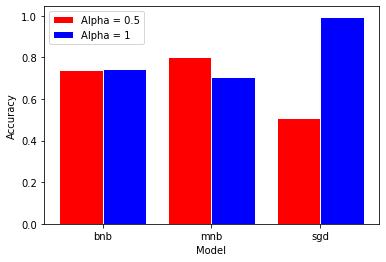

In [14]:
x = np.arange(3)
width = 0.40
plt.bar(x-0.2,[bnb_10k_alpha[0],mnb_10k_alpha[0],sgd_10k_alpha[0]], width, color='red',edgecolor='white')
plt.bar(x+0.2,[bnb_10k[0],mnb_10k[0],sgd_10k[0]], width,color='blue',edgecolor='white')
plt.xticks(x, ['bnb', 'mnb', 'sgd'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.legend(["Alpha = 0.5", "Alpha = 1"])
plt.show()

# K - Means Clustering

In [15]:
kmc_model = joblib.load(BATCH_DATASET_DIR + "10k/KMC.pkl")
X = np.loadtxt(TEST_DIR + "feature_cols.csv", delimiter=',')
y = np.loadtxt(TEST_DIR + "target_cols.csv")
y = y.astype(int)
pca = PCA(2)

In [16]:
# decomposition to lower dim for plotting
X_2d = pca.fit_transform(X)
y_preds = kmc_model.predict(X)
centroids = pca.transform(kmc_model.cluster_centers_)

In [17]:
cor_preds = []      # mails predicted correctly
wrg_pred_ham = []   # mails wrongly predicted as Ham
wrg_pred_spam = []  # mails wrongly predicted as Spam


for data, y_acc, y_pred in zip(X_2d.tolist(),y, y_preds):
  if y_acc == y_pred:
    cor_preds.append(data)
  else:
    if y_acc == 1:    # 0 for spam and 1 for ham
      wrg_pred_spam.append(data)
    else:
      wrg_pred_ham.append(data)

In [18]:
cor_preds = np.array(cor_preds)
wrg_pred_ham = np.array(wrg_pred_ham)
wrg_pred_spam = np.array(wrg_pred_spam)

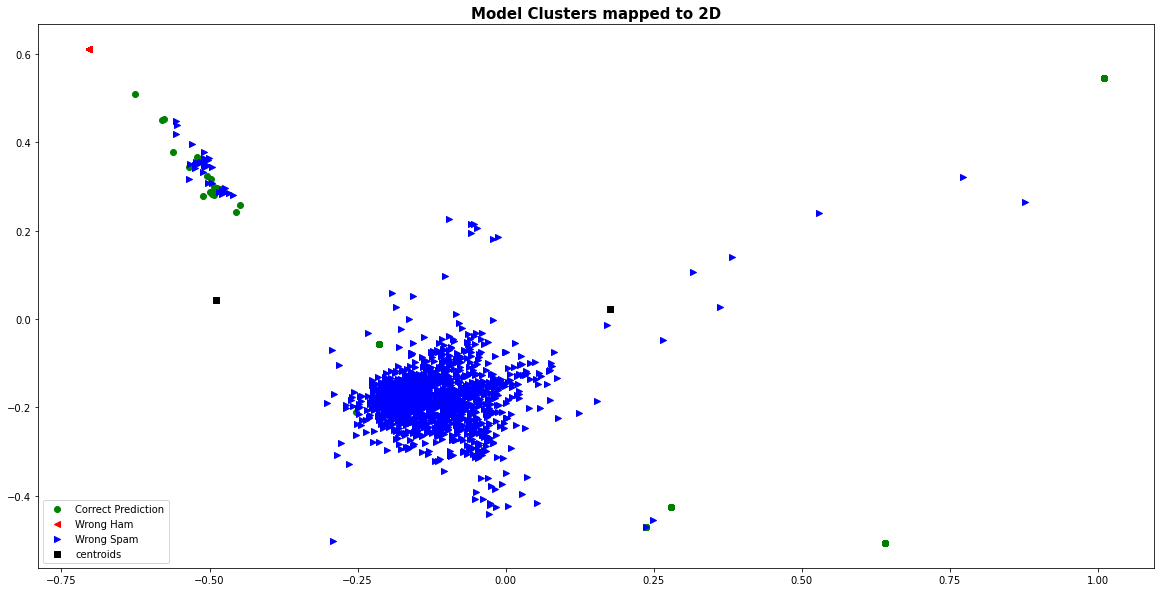

In [19]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

ax1.scatter(cor_preds[:,0], cor_preds[:,1], c='g', marker='o', label = 'Correct Prediction')
ax1.scatter(wrg_pred_ham[:,0], wrg_pred_ham[:,1], c='r', marker='<', label = 'Wrong Ham')
ax1.scatter(wrg_pred_spam[:,0], wrg_pred_spam[:,1], c='b', marker='>', label = 'Wrong Spam')
ax1.scatter(centroids[:,0], centroids[:,1], c='black', marker='s', label = 'centroids')
plt.legend(loc='best')
plt.title("Model Clusters mapped to 2D", fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.show()
